Cargar los datos

In [150]:
import pandas as pd
datos=pd.read_csv('housing.csv')

In [151]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Gráfico de mapa

<Axes: xlabel='population', ylabel='households'>

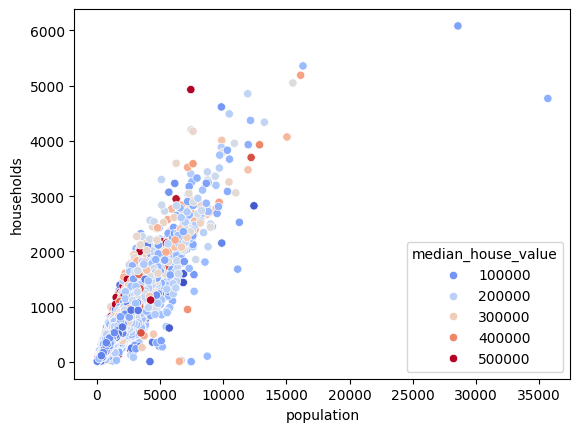

In [152]:
import seaborn as sb 
sb.scatterplot(x=datos['population'],y=datos['households'],hue=datos['median_house_value'],data=datos, palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

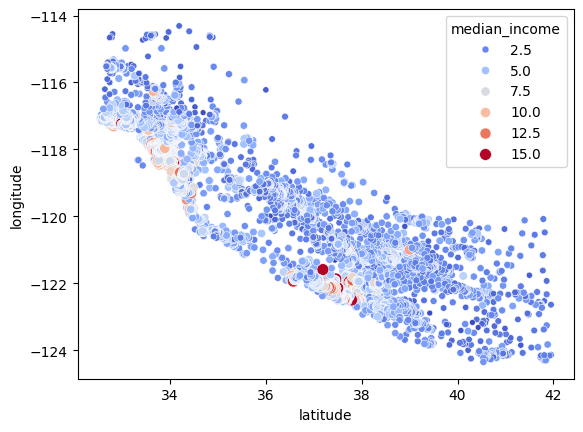

In [153]:
import seaborn as sb 
sb.scatterplot(x=datos['latitude'],y=datos['longitude'],hue=datos['median_income'],data=datos, palette='coolwarm',size=datos["median_income"])

In [154]:
datos.loc[:,["latitude","longitude","population","households"]]

,latitude,longitude,population,households
0,37.88,-122.23,322.0,126.0
1,37.86,-122.22,2401.0,1138.0
2,37.85,-122.24,496.0,177.0
3,37.85,-122.25,558.0,219.0
4,37.85,-122.25,565.0,259.0
...,...,...,...,...
20635,39.48,-121.09,845.0,330.0
20636,39.49,-121.21,356.0,114.0
20637,39.43,-121.22,1007.0,433.0
20638,39.43,-121.32,741.0,349.0


Crear modelo

In [155]:
from sklearn.cluster import KMeans
x=datos.loc[:,["latitude","longitude","population","households"]]
x["personas_por_Casa"]=x["population"]/x["households"]
x=x.drop(x[x["personas_por_Casa"]>10].index)
modelo=KMeans(n_clusters=4)
predicciones=modelo.fit_predict(x)

c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [156]:
predicciones.shape

(20603,)

Agregar un nuevo campo al data frame

In [157]:
x["grupos"]=predicciones

In [158]:
x

,latitude,longitude,population,households,personas_por_Casa,grupos
0,37.88,-122.23,322.0,126.0,2.555556,1
1,37.86,-122.22,2401.0,1138.0,2.109842,0
2,37.85,-122.24,496.0,177.0,2.802260,1
3,37.85,-122.25,558.0,219.0,2.547945,1
4,37.85,-122.25,565.0,259.0,2.181467,1
...,...,...,...,...,...,...
20635,39.48,-121.09,845.0,330.0,2.560606,1
20636,39.49,-121.21,356.0,114.0,3.122807,1
20637,39.43,-121.22,1007.0,433.0,2.325635,1
20638,39.43,-121.32,741.0,349.0,2.123209,1


Contar cuantos elementos hay en cada segmento

In [159]:
x["grupos"].value_counts()

grupos
1    11457
0     7139
3     1792
2      215
Name: count, dtype: int64

Gráfica

<Axes: xlabel='longitude', ylabel='latitude'>

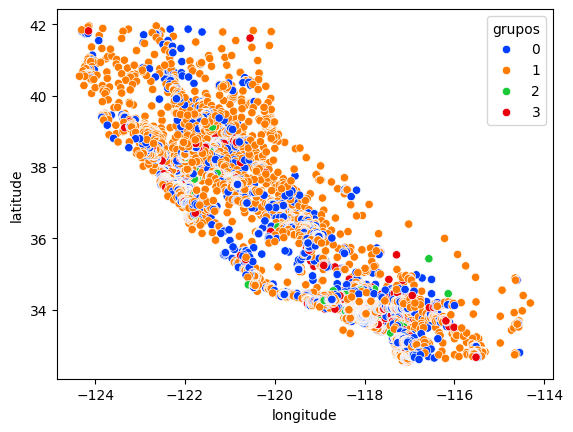

In [160]:
import seaborn as sb 
sb.scatterplot(x='longitude',y='latitude',hue='grupos',data=x, palette='bright')

C:\Users\andre\AppData\Local\Temp\ipykernel_22312\1895949102.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='grupos',data=x, palette='bright')


<Axes: xlabel='grupos', ylabel='count'>

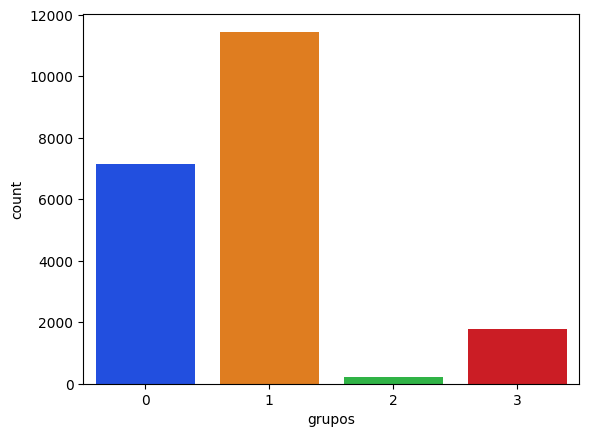

In [161]:
sb.countplot(x='grupos',data=x, palette='bright')

Agrupar por segmento económico

In [162]:
x.groupby("grupos")["personas_por_Casa"].mean() 

grupos
0    3.031923
1    2.806963
2    3.173183
3    3.149392
Name: personas_por_Casa, dtype: float64